### Simple TMP2 read() to see current room temperature and humidity.

In [2]:
from pynq.overlays.base import BaseOverlay
#"base.bit" is the base overlay, it is downloaded onto the FPGA. 
#This bitstream is a custom fabric designed by an FPGA designer.
#bitstreams can be easily exchanged with each other as needed by the software engineer!
base = BaseOverlay("base.bit")


In [3]:
from time import time, sleep
from pynq.lib.pmod.pmod_grove_th02 import Grove_TH02
from pynq.lib.pmod import PMOD_GROVE_G3

#The Temp + Humidity sensor uses the PYNQ grove adapter.
#To use, plug the grove adapter into PMODA, and the grove connector into the G3 port.
#This sensor talks i2c, as long as the i2c device is on the chain connected to G3,
#it can talk.
mytmp = Grove_TH02(base.PMODA, PMOD_GROVE_G3)
reading = mytmp.read()

print('test data: {:5} , {:5f}'.format(reading[0],reading[1]))


##Collects time and log data from sensor for 10 samples 1 second apart 
log = []
time_log =[]
start_time = time()
for x in range(10):
    sleep(1)
    log.append(mytmp.read())
    time_log.append(time() - start_time)
    


test data: 25.53125 , 53.062500


index---|--time (s)--|--temperature (celsius)--|--------humidity---------
1       |1.070       |         25.500          |         53.125          
2       |2.139       |         25.500          |         53.062          
3       |3.208       |         25.500          |         53.000          
4       |4.276       |         25.531          |         53.000          
5       |5.346       |         25.469          |         53.062          
6       |6.415       |         25.500          |         53.062          
7       |7.484       |         25.500          |         53.062          
8       |8.553       |         25.500          |         53.000          
9       |9.622       |         25.469          |         53.062          
10      |10.691      |         25.500          |         53.062          


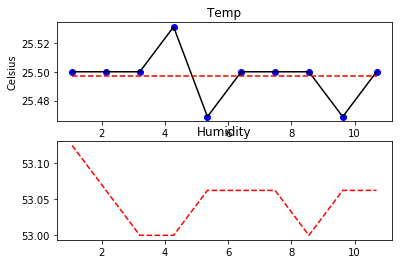

In [4]:
from numpy import std, mean
import matplotlib.pyplot as plt
%matplotlib inline

def display_table(time_log, temp_log, humidity_log):
    
    print('{:-<8}|{:-^12}|{:-^25}|{:-^25}'.format('index',
                                                         'time (s)',
                                                         'temperature (celsius)', 
                                                         'humidity'))
    i = 0
    for ti, tem, humi in zip(time_log, temp_log, humidity_log):
        i += 1
        print('{:<8}|{:<#12.3f}|{:^#25.3f}|{:^#25.3f}'.format(i,
                                                             ti,
                                                             tem, 
                                                             humi))
        
##Parses and visualizes collected data        

temp = [x for x,_ in log]
humidity = [y for _,y in log]
mean_data = [mean(temp) for x in range(len(log))]

display_table(time_log, temp, humidity)

import numpy as np
import matplotlib.pyplot as plt

plt.figure(1)
plt.subplot(211)
plt.plot(time_log, temp, 'bo', time_log, temp, 'k', time_log, mean_data, 'r--')
plt.title('Temp')
plt.ylabel('Celsius')

plt.subplot(212)
plt.plot(time_log, humidity, 'r--')
plt.title('Humidity')

plt.show()